(142399, 8)
(142399,)
(99679, 8)
(99679,)
Mean squared error: 111180250901786.66
Coefficient of determination: 0.87


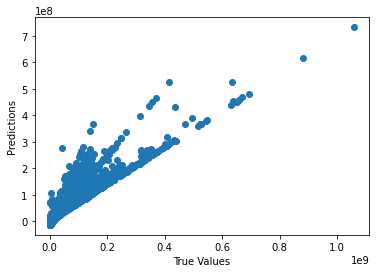

Coefficients: 
 [-11472.34856001   9025.75123274  74036.30932723  46011.97460241
  61807.76865487 -92196.94413653    169.2444801   28024.33472482]
Intercept: 
 421927.5097911153
Score: 
 0.8706458117384182
Model: 
 LinearRegression()
scores: 
 [-1.25342066e+14 -9.75473020e+13 -1.29780402e+14 -9.59029870e+13
 -1.13400570e+14 -9.94696135e+13 -1.18181814e+14]
-111374964724014.38
12854126702559.555


In [56]:
#notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# ticket cinema regressao

#import cinematicket_ref.csv

# tentar prever preco total de vendas com base em outras variaveis
df = pd.read_csv('cinematicket_ref.csv', sep=",", header=0)
df.dropna(inplace=True)

cinema={}
cinema["features"] = np.hstack([df.values[::, :2], df.values[::, 3:9]])
cinema["target"] = df.values[:, 2]

#passando de 1D para 2D
# cinema['features'].reshape(-1,1)
# cinema['target'].reshape(-1,1)

print(cinema['features'].shape)
print(cinema['target'].shape)


def regression_analysis(target, features):
    # split the data into training and testing sets

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3)
    # train the model
    
    print(x_train.shape)
    print(y_train.shape)

    model = LinearRegression()
    model.fit(x_train, y_train)
    # make predictions
    y_pred = model.predict(x_test)
    # evaluate the model
    from sklearn.metrics import mean_squared_error, r2_score
    print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
    print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
    # plot the results
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()
    # print the coefficients
    print('Coefficients: \n', model.coef_)
    # print the intercept
    print('Intercept: \n', model.intercept_)
    # print the score
    print('Score: \n', model.score(x_test, y_test))
    # print the model
    print('Model: \n', model)
    
    from sklearn.model_selection import cross_val_score
    
    scores = cross_val_score(model, x_test, y_test, cv=7, scoring='neg_mean_squared_error')
    print('scores: \n', scores)
    
    print(scores.mean())
    print(scores.std())

regression_analysis(cinema["target"], cinema["features"])
